In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


In [3]:
df = pd.read_csv("/kaggle/input/delhi-aqi-2/delhi_ncr_aqi_dataset.csv")
df.head()


,datetime,date,year,month,day,hour,day_of_week,is_weekend,season,city,...,no2,so2,co,o3,temperature,humidity,wind_speed,visibility,aqi,aqi_category
0,2020-01-01 06:00:00,2020-01-01,2020,1,1,6,Wednesday,0,winter,Delhi,...,119.6,47.7,5.19,12.3,9.4,100,3.6,1.2,500,Severe
1,2020-01-01 12:00:00,2020-01-01,2020,1,1,12,Wednesday,0,winter,Delhi,...,117.9,39.3,4.32,15.8,20.6,50,5.9,1.4,500,Severe
2,2020-01-01 18:00:00,2020-01-01,2020,1,1,18,Wednesday,0,winter,Delhi,...,150.1,36.3,7.13,14.3,12.4,56,4.5,1.1,500,Severe
3,2020-01-01 23:00:00,2020-01-01,2020,1,1,23,Wednesday,0,winter,Delhi,...,142.0,30.3,4.90,13.2,14.4,48,5.8,1.4,500,Severe
4,2020-01-01 06:00:00,2020-01-01,2020,1,1,6,Wednesday,0,winter,Delhi,...,138.4,41.5,7.56,15.4,6.8,100,2.8,0.4,500,Severe


In [4]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201664 entries, 0 to 201663
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime      201664 non-null  object 
 1   date          201664 non-null  object 
 2   year          201664 non-null  int64  
 3   month         201664 non-null  int64  
 4   day           201664 non-null  int64  
 5   hour          201664 non-null  int64  
 6   day_of_week   201664 non-null  object 
 7   is_weekend    201664 non-null  int64  
 8   season        201664 non-null  object 
 9   city          201664 non-null  object 
 10  station       201664 non-null  object 
 11  latitude      201664 non-null  float64
 12  longitude     201664 non-null  float64
 13  pm25          201664 non-null  float64
 14  pm10          201664 non-null  float64
 15  no2           201664 non-null  float64
 16  so2           201664 non-null  float64
 17  co            201664 non-null  float64
 18  o3  

,year,month,day,hour,is_weekend,latitude,longitude,pm25,pm10,no2,so2,co,o3,temperature,humidity,wind_speed,visibility,aqi
count,201664.000000,201664.000000,201664.000000,201664.000000,201664.000000,201664.000000,201664.000000,201664.000000,201664.000000,201664.000000,201664.000000,201664.000000,201664.000000,201664.000000,201664.000000,201664.000000,201664.000000,201664.000000
mean,2022.499544,6.521898,15.732664,14.750000,0.285584,28.596791,77.208600,183.420341,348.567402,69.761495,16.028998,3.033964,27.185762,26.895227,61.041564,10.528524,5.007801,265.830148
std,1.708185,3.448995,8.801392,6.378691,0.451693,0.112215,0.125113,193.138161,370.016790,75.972086,17.201027,3.284094,13.569802,8.984843,24.737106,6.045043,3.685609,171.508950
min,2020.000000,1.000000,1.000000,6.000000,0.000000,28.372200,77.026600,15.000000,24.000000,8.000000,4.000000,0.300000,12.000000,6.000000,20.000000,2.100000,0.200000,25.000000
25%,2021.000000,4.000000,8.000000,10.500000,0.000000,28.530800,77.071200,55.300000,104.100000,19.900000,4.500000,0.870000,18.000000,19.900000,39.000000,5.900000,1.900000,103.000000
50%,2022.500000,7.000000,16.000000,15.000000,0.000000,28.624600,77.201000,99.500000,189.800000,38.300000,8.700000,1.690000,23.300000,27.600000,58.000000,9.200000,4.400000,232.000000
75%,2024.000000,10.000000,23.000000,19.250000,1.000000,28.668300,77.316400,254.700000,481.200000,94.000000,20.900000,4.120000,31.800000,33.500000,83.000000,14.200000,7.100000,464.000000
max,2025.000000,12.000000,31.000000,23.000000,1.000000,28.776200,77.504000,900.000000,1979.700000,593.500000,121.600000,22.670000,84.000000,44.800000,100.000000,31.500000,15.000000,500.000000


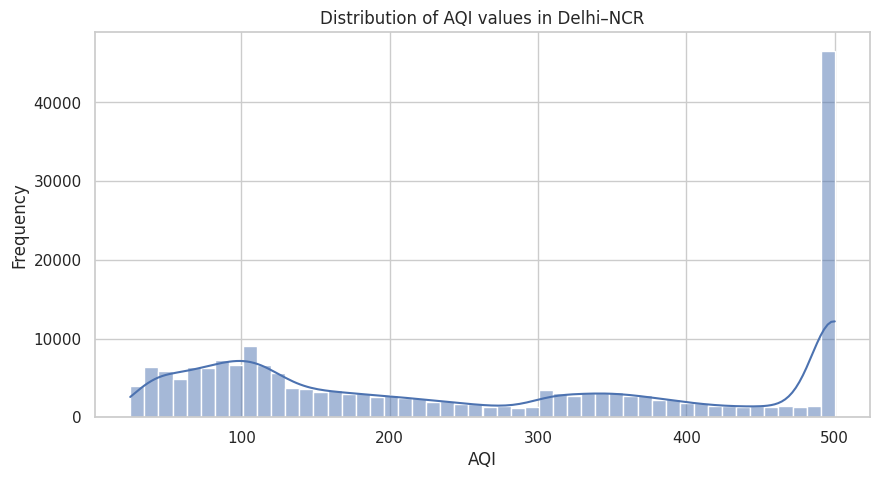

In [5]:
sns.histplot(df["aqi"], bins=50, kde=True)
plt.title("Distribution of AQI values in Delhi–NCR")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()


The AQI distribution is highly right-skewed with a visible cap at 500, indicating that extreme pollution events are frequent but censored by the AQI scale. This motivates careful interpretation of regression-based models.


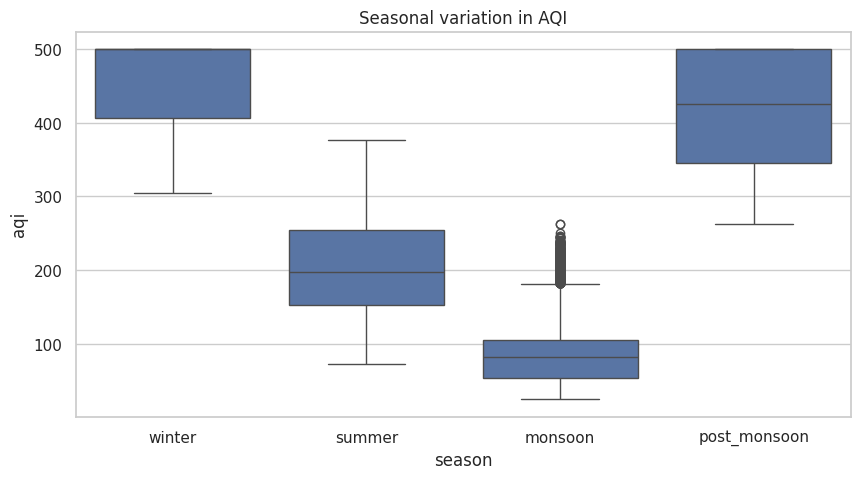

In [6]:
sns.boxplot(x="season", y="aqi", data=df)
plt.title("Seasonal variation in AQI")
plt.show()


AQI exhibits strong seasonal variation, with winter and post-monsoon periods showing consistently higher pollution levels. This highlights the importance of temporal and seasonal context in forecasting AQI.


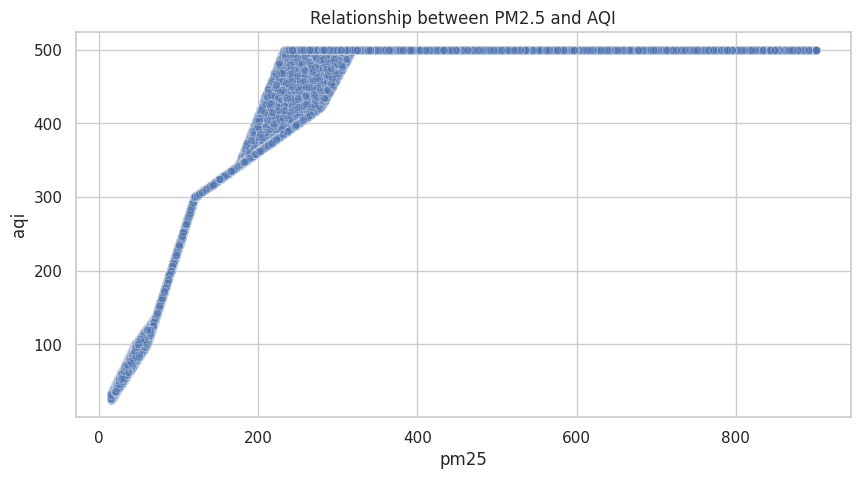

In [7]:
sns.scatterplot(x="pm25", y="aqi", data=df, alpha=0.3)
plt.title("Relationship between PM2.5 and AQI")
plt.show()


AQI shows a near-deterministic relationship with PM2.5 until the AQI scale saturates at 500. This confirms that PM2.5 is a dominant contributor to AQI and introduces potential target leakage in predictive models.
